<p style="font-family:Verdana; font-size: 26px; color: magenta"> 5.0 - IPL Score Prediction using Deep Learning</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> In the modern era of cricket analytics, where each run and decision can change the outcome, the application of Deep Learning  </p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1. for IPL score prediction stands at the forefront of innovation</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Import Libraries</p>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Loading the Data</p>

In [7]:
# Ihe dataset contains 284,807 transactions with 31 features including:
df = pd.read_csv('../../data/ipl_data.csv')
 
df.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222


In [8]:
df.shape

(76014, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Data Pre-processing</p>

In [10]:
# To check the null values in the dataset.
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

In [11]:
# Dropping certain features 
df = df.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [12]:
# We have split the data frame into independent variable (X) and dependent variables (y). 
# Our dependent variables is the total score.
X = df.drop(['total'], axis =1)
y = df['total']

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Data Preprocessing</p>

In [14]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [15]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
# Scaling is performed to ensure consistent scale to improve model performance.
# Scaling has transformed both training and testing data using the scaling parameters.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Define the Neural Network</p>

In [18]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: Model Training</p>

In [19]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 55.4313 - val_loss: 22.2639
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 22.2675 - val_loss: 22.0035
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 22.2681 - val_loss: 22.0725
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 22.1115 - val_loss: 21.8166
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 22.0389 - val_loss: 21.6966
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 21.8498 - val_loss: 21.8424
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 21.9030 - val_loss: 21.5394
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 21.7341 - val_loss: 21.4898
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 21.8548 - val_loss: 21.4822
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 21.7349 - val_loss: 21.7713
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 21.7098 - val_loss: 21.4497
Epoch 12/50

<Axes: >

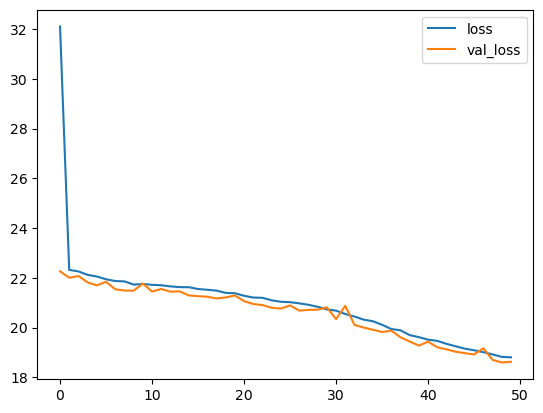

In [20]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 7: Model Evaluation</p>

In [21]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


19.11835445578855